In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from datafile_methods.data_processing import load_data
DATA_PATH = '../data/'
PREDICTION_PATH = '../data/predictions/'

In [3]:
from datafile_methods.data_io import load_datasets

# Load datasets
folds, ratings, sample_submission = load_datasets()

In [4]:
models = ['baseline',
          'knn_baseline_i',
          'knn_baseline_u',
          'mf_svd_sci',
          'nmf',
          'slope_one',
          'sur_svd',
          'mf_als_recommend',
          'mf_als']

# Model parameter adjustment

Scipy

In [ ]:
errors_sc = {
 '05': [[ 0.97270177,  0.97316066,  0.97280212,  0.97244631,  0.97279005],
  [ 0.99730966,  0.99560469,  0.99633474,  0.99971287,  0.99784341]],
 '15': [[ 0.94647595,  0.94696315,  0.94695074,  0.94598485,  0.94635553],
  [ 0.99623055,  0.99448407,  0.99528854,  0.99827751,  0.99653788]],
 '17': [[ 0.94174593,  0.94230752,  0.94209953,  0.94109987,  0.9415659 ],
  [ 0.99616505,  0.99450738,  0.99555233,  0.99837099,  0.99669194]],
 '25': [[ 0.92369856,  0.92395076,  0.92351618,  0.92288001,  0.92362356],
  [ 0.99712052,  0.99574494,  0.9962677 ,  0.99922068,  0.99742583]],
 '03': [[ 0.98001665,  0.97985069,  0.98011265,  0.97945982,  0.97966539],
  [ 0.99923999,  0.9972677 ,  0.99823564,  1.00146609,  0.999349  ]],
 '11': [[ 0.9560467 ,  0.9567148 ,  0.95622841,  0.95573098,  0.95595145],
  [ 0.99603571,  0.99456326,  0.99520994,  0.99828116,  0.9964187 ]],
 '13': [[ 0.95135504,  0.9518707 ,  0.95149805,  0.9507868 ,  0.95116691],
  [ 0.99601752,  0.99452261,  0.99532743,  0.9982914 ,  0.9965627 ]],
 '19': [[ 0.93718099,  0.93761667,  0.93718702,  0.93632078,  0.93687795],
  [ 0.99645983,  0.99497089,  0.99565679,  0.99868621,  0.9968124 ]],
 '21': [[ 0.93248449,  0.93295109,  0.93258858,  0.93178116,  0.93243839],
  [ 0.99656524,  0.99521332,  0.99584325,  0.99883187,  0.99702808]],
 '23': [[ 0.92787194,  0.9284434 ,  0.92791505,  0.92724034,  0.92781381],
  [ 0.99691538,  0.99545004,  0.99612445,  0.99894211,  0.99716874]],
 '27': [[ 0.91934151,  0.91952939,  0.91929975,  0.91872964,  0.91942917],
  [ 0.99744576,  0.9958609 ,  0.9964279 ,  0.99943785,  0.99760864]],
 '29': [[ 0.91520476,  0.91554592,  0.9150979 ,  0.91447001,  0.91547225],
  [ 0.9975872 ,  0.99612561,  0.99648016,  0.99968566,  0.99792499]],
 '31': [[ 0.91096944,  0.91137237,  0.91111585,  0.91032241,  0.9110775 ],
  [ 0.99775751,  0.99644997,  0.99664171,  0.99995077,  0.99819921]],
 '33': [[ 0.90693585,  0.90757319,  0.9070649 ,  0.90637533,  0.90691559],
  [ 0.9979235 ,  0.99674212,  0.99693216,  1.0001753 ,  0.99846752]],
 '35': [[ 0.90290307,  0.9034876 ,  0.90296242,  0.90215299,  0.90285271],
  [ 0.99831048,  0.99687161,  0.99719786,  1.00044638,  0.99855299]],
 '07': [[ 0.96661141,  0.96709094,  0.96656901,  0.9659833 ,  0.96650999],
  [ 0.99653633,  0.99485128,  0.99571836,  0.99869003,  0.99693379]],
 '09': [[ 0.96107032,  0.96151802,  0.96085395,  0.96044074,  0.96094864],
  [ 0.99617665,  0.99455563,  0.99534517,  0.99836964,  0.99664914]]}

In [ ]:
train_errors_sc = pd.DataFrame({model: m_errors[0] for model, m_errors in errors_sc.items()})
test_errors_sc = pd.DataFrame({model: m_errors[1] for model, m_errors in errors_sc.items()})

In [ ]:
plt.figure(figsize=(14,5))
train_errors_sc.boxplot()
test_errors_sc.boxplot()

In [ ]:
plt.figure(figsize=(14,5))
test_errors_sc[['03','05','07','13','19','25','35']].boxplot()

In [ ]:
errors_sk = {'03': [[ 0.98001665,  0.97985069,  0.98011265,  0.97945982,  0.97966539],
  [ 0.99923999,  0.9972677 ,  0.99823564,  1.00146609,  0.999349  ]],
 '05': [[ 0.97270177,  0.97316066,  0.97280212,  0.97244631,  0.97279004],
  [ 0.99730966,  0.99560469,  0.99633474,  0.99971287,  0.99784341]],
 '07': [[ 0.96661141,  0.96709094,  0.96656901,  0.9659833 ,  0.96651002],
  [ 0.99653633,  0.99485127,  0.99571837,  0.99869003,  0.99693379]],
 '09': [[ 0.96107037,  0.96151796,  0.96085401,  0.96044072,  0.96094869],
  [ 0.99617666,  0.99455558,  0.9953452 ,  0.99836964,  0.99664907]],
 '11': [[ 0.95604677,  0.95671483,  0.95622853,  0.95573096,  0.95595154],
  [ 0.9960356 ,  0.99456342,  0.99521   ,  0.99828111,  0.99641878]],
 '13': [[ 0.95135528,  0.95187106,  0.95149846,  0.95078682,  0.95116699],
  [ 0.99601761,  0.99452242,  0.99532679,  0.99829138,  0.996563  ]],
 '15': [[ 0.94647522,  0.94696212,  0.94695092,  0.94598458,  0.94635388],
  [ 0.99623038,  0.99448332,  0.99528858,  0.99827728,  0.99653665]],
 '17': [[ 0.94174489,  0.94230624,  0.94209997,  0.94109883,  0.9415669 ],
  [ 0.99616458,  0.99450593,  0.99555218,  0.99837099,  0.9966911 ]],
 '19': [[ 0.93718039,  0.9376148 ,  0.93718619,  0.93632814,  0.93687514],
  [ 0.99646358,  0.99497431,  0.9956576 ,  0.99868282,  0.99681424]],
 '21': [[ 0.93249385,  0.93294613,  0.93259075,  0.93178372,  0.93243883],
  [ 0.9965766 ,  0.99521838,  0.99584397,  0.99883607,  0.99702822]],
 '23': [[ 0.92788798,  0.92844659,  0.92789341,  0.92724524,  0.92781303],
  [ 0.99691046,  0.995448  ,  0.99614639,  0.99893696,  0.9971638 ]],
 '25': [[ 0.92369004,  0.92395166,  0.92351934,  0.92289914,  0.92362244],
  [ 0.99712973,  0.99573706,  0.99627893,  0.99923287,  0.99743282]],
 '27': [[ 0.91931121,  0.91954482,  0.91930111,  0.91870567,  0.91943166],
  [ 0.99744232,  0.9958687 ,  0.99643206,  0.99944247,  0.99761095]],
 '29': [[ 0.91519414,  0.91555719,  0.91510107,  0.91447906,  0.91547329],
  [ 0.99757305,  0.99612985,  0.99648569,  0.99968696,  0.99792266]],
 '35': [[ 0.90291524,  0.90347941,  0.90299347,  0.90213266,  0.90285086],
  [ 0.99830211,  0.99687539,  0.99718277,  1.00044685,  0.99856132]]}

In [ ]:
train_errors_sk = pd.DataFrame({model: m_errors[0] for model, m_errors in errors_sk.items()})
test_errors_sk = pd.DataFrame({model: m_errors[1] for model, m_errors in errors_sk.items()})

In [ ]:
plt.figure(figsize=(14,5))
train_errors_sk.boxplot()
test_errors_sk.boxplot()

In [ ]:
plt.figure(figsize=(14,5))
test_errors_sk[['03','05','07','13','19','25','35']].boxplot()

In [ ]:
# k20, n_iter50, reg varies
errors_re = {'0.055': [[ 0.8377177 ,  0.83777787,  0.8376534 ,  0.83727922,  0.83731918],
  [ 1.01145111,  1.00916151,  1.01056832,  1.01327156,  1.01152635]],
 '0.06': [[ 0.84537539,  0.84544701,  0.84528512,  0.8449052 ,  0.84502279],
  [ 1.00696308,  1.0047198 ,  1.00612283,  1.00885289,  1.00704045]],
 '0.065': [[ 0.85329364,  0.85338842,  0.85318143,  0.85280873,  0.85298819],
  [ 1.0032271 ,  1.00105442,  1.00245184,  1.0051857 ,  1.00333106]],
 '0.07': [[ 0.86144981,  0.86157412,  0.86132254,  0.8609651 ,  0.86118869],
  [ 1.00019771,  0.99808206,  0.99947987,  1.00220112,  1.00032903]],
 '0.075': [[ 0.86982207,  0.86997783,  0.86968395,  0.86935061,  0.86959885],
  [ 0.99782287,  0.99574798,  0.99715007,  0.99983939,  0.99797285]],
 '0.08': [[ 0.87838843,  0.87857627,  0.87824105,  0.87794241,  0.87819517],
  [ 0.99605946,  0.99400325,  0.9954092 ,  0.99804279,  0.9962121 ]],
 '0.085': [[ 0.88712575,  0.88734776,  0.88697049,  0.88671749,  0.88695225],
  [ 0.99485903,  0.99279848,  0.99421156,  0.99677274,  0.99500636]],
 '0.09': [[ 0.89600972,  0.89626992,  0.89584997,  0.89564995,  0.89583832],
  [ 0.99416921,  0.99208733,  0.99350927,  0.99598667,  0.99430895]],
 '0.095': [[ 0.90501431,  0.90531909,  0.90485571,  0.90470203,  0.90482273],
  [ 0.99393783,  0.99182319,  0.99325246,  0.99564449,  0.99406357]],
 '0.1': [[ 0.91411255,  0.91446871,  0.91395924,  0.91382307,  0.9138894 ],
  [ 0.9941081 ,  0.99196042,  0.99339769,  0.9957112 ,  0.99421518]]}

In [ ]:
train_errors_re = pd.DataFrame({model: m_errors[0] for model, m_errors in errors_re.items()})
test_errors_re = pd.DataFrame({model: m_errors[1] for model, m_errors in errors_re.items()})

In [ ]:
plt.figure(figsize=(14,5))
train_errors_re.boxplot()
test_errors_re.boxplot()

In [ ]:
# Here im using 0.085 bc it gives better results!!
plt.figure(figsize=(14,5))
test_errors_re.boxplot()

In [ ]:
errors_sur_svd = {'0.06': [[ 0.74950633,  0.74916149,  0.7494349 ,  0.74953836,  0.74970652],
  [ 0.99321666,  0.99098355,  0.99322932,  0.99528198,  0.99333216]],
  '0.065': [[ 0.785207  ,  0.78505567,  0.78511465,  0.78539203,  0.78555635],
  [ 0.99009985,  0.98788137,  0.98995628,  0.99210459,  0.99018139]],
 '0.07': [[ 0.81894318,  0.81898369,  0.81883913,  0.81922909,  0.81939788],
  [ 0.98812418,  0.98591379,  0.98781895,  0.99005976,  0.9881808 ]],
 '0.075': [[ 0.8500643 ,  0.85026095,  0.84993965,  0.85036896,  0.85053494],
  [ 0.98715118,  0.9849444 ,  0.98668749,  0.98900942,  0.98718898]],
 '0.08': [[ 0.87792296,  0.8782257 ,  0.87775975,  0.87815772,  0.87831429],
  [ 0.98702295,  0.98481952,  0.98641145,  0.9887999 ,  0.9870455 ]],
 '0.085': [[ 0.90199292,  0.90236337,  0.90178164,  0.90209379,  0.90225015],
  [ 0.98755252,  0.9853611 ,  0.98681256,  0.98925307,  0.98756362]],
 '0.09': [[ 0.9220038 ,  0.9224337 ,  0.92175803,  0.92195296,  0.9221351 ],
  [ 0.98853193,  0.98637509,  0.98769401,  0.99017452,  0.98854289]],
 '0.10': [[ 0.95050828,  0.95111433,  0.95029729,  0.95024526,  0.95055769],
  [ 0.99111003,  0.98911876,  0.99019097,  0.99272297,  0.99118022]],
 '0.11': [[ 0.96751873,  0.96831637,  0.9674054 ,  0.9671782 ,  0.96763865],
  [ 0.99390899,  0.99216944,  0.9930216 ,  0.99558192,  0.99410577]]}

In [ ]:
train_errors_sur_svd = pd.DataFrame({model: m_errors[0] for model, m_errors in errors_sur_svd.items()})
test_errors_sur_svd = pd.DataFrame({model: m_errors[1] for model, m_errors in errors_sur_svd.items()})

In [ ]:
plt.figure(figsize=(14,5))
train_errors_sur_svd.boxplot()
test_errors_sur_svd.boxplot()

In [ ]:
plt.figure(figsize=(14,5))
test_errors_sur_svd.boxplot()

In [ ]:
errors_knn_i = {'040': [[ 0.88871982,  0.88914256,  0.88884091,  0.88835995,  0.88874326],
  [ 0.99536885,  0.99306851,  0.99444285,  0.99683294,  0.99518517]],
 '050': [[ 0.90452063,  0.90492948,  0.90451007,  0.9042158 ,  0.90447943],
  [ 0.99476423,  0.99260501,  0.99402229,  0.99656056,  0.99475926]],
 '060': [[ 0.91587251,  0.91626753,  0.91588456,  0.9155493 ,  0.9158178 ],
  [ 0.99486469,  0.99258583,  0.99411646,  0.99657762,  0.99476892]],
 '070': [[ 0.92439223,  0.92479294,  0.92437977,  0.92394634,  0.92435673],
  [ 0.9949876 ,  0.99288048,  0.99420584,  0.99672401,  0.99488841]],
 '080': [[ 0.93101966,  0.93141953,  0.93102366,  0.93055289,  0.93098325],
  [ 0.99516219,  0.99326188,  0.9945275 ,  0.99702149,  0.99522845]],
 '090': [[ 0.93624044,  0.93666394,  0.93628135,  0.93579542,  0.9361914 ],
  [ 0.99551993,  0.99354229,  0.99478285,  0.99725578,  0.99546209]],
 '100': [[ 0.94043997,  0.9408408 ,  0.94043705,  0.93995166,  0.94038781],
  [ 0.99576306,  0.99381215,  0.9950827 ,  0.99759898,  0.99576086]],
 '110': [[ 0.94381172,  0.94421708,  0.94383717,  0.94330777,  0.94372838],
  [ 0.99608084,  0.99418223,  0.99536928,  0.99789007,  0.99603615]],
 '120': [[ 0.94654128,  0.94697197,  0.94658684,  0.94601615,  0.94647668],
  [ 0.99630403,  0.99446918,  0.99561056,  0.99819283,  0.99635748]],
 '130': [[ 0.94877128,  0.94919941,  0.94886182,  0.94825933,  0.94872746],
  [ 0.99646625,  0.99473848,  0.99590295,  0.99843586,  0.99662804]],
 '140': [[ 0.95062545,  0.9510393 ,  0.95071577,  0.95012039,  0.95055352],
  [ 0.99667391,  0.99497544,  0.99609765,  0.99870833,  0.99686449]],
 '150': [[ 0.95213537,  0.95253496,  0.95221711,  0.95161362,  0.9520699 ],
  [ 0.99682878,  0.99515448,  0.9962671 ,  0.99893025,  0.99702739]],
 '160': [[ 0.95336521,  0.95376718,  0.95344251,  0.95284412,  0.95330573],
  [ 0.99701151,  0.99533293,  0.99641786,  0.99908363,  0.99720353]],
 '170': [[ 0.95435788,  0.95476849,  0.9544427 ,  0.95383166,  0.95431117],
  [ 0.99712186,  0.99547933,  0.99657272,  0.99922438,  0.99735538]],
 '190': [[ 0.95588323,  0.9562519 ,  0.95595064,  0.95534167,  0.95582028],
  [ 0.99731974,  0.99573342,  0.99677261,  0.99944187,  0.99759021]],
 '210': [[ 0.95686995,  0.95724391,  0.95696976,  0.95635953,  0.95679822],
  [ 0.99746521,  0.99590588,  0.99691432,  0.99959266,  0.99774397]],
 '240': [[ 0.95770782,  0.95808401,  0.95781368,  0.95720668,  0.9576366 ],
  [ 0.99755974,  0.99607281,  0.99704991,  0.999727  ,  0.99788693]]}

In [ ]:
train_errors_knn_i = pd.DataFrame({model: m_errors[0] for model, m_errors in errors_knn_i.items()})
test_errors_knn_i = pd.DataFrame({model: m_errors[1] for model, m_errors in errors_knn_i.items()})

In [ ]:
plt.figure(figsize=(14,5))
train_errors_knn_i.boxplot()
test_errors_knn_i.boxplot()

In [ ]:
plt.figure(figsize=(14,5))
test_errors_knn_i[['040','060','080','100','120','140','160','190','210','240']].boxplot()

In [ ]:
#k18, reg_b = 0.055, n_e = 100, changing reg_pu/qi

errors_nmf_reg_18 = {'0.03': [[ 0.92722152,  0.92888413,  0.92814306,  0.9277159 ,  0.9280622 ],
  [ 1.00454164,  1.00274591,  1.00472323,  1.00632495,  1.00504759]],
 '0.04': [[ 0.94440057,  0.94576105,  0.94531899,  0.94469278,  0.94495509],
  [ 0.99867813,  0.99692202,  0.99851266,  1.00052735,  0.99915682]],
 '0.05': [[ 0.96258117,  0.96348362,  0.96333793,  0.96262212,  0.96291275],
  [ 0.99673719,  0.99504876,  0.99634717,  0.99862126,  0.99710635]],
 '0.06': [[ 0.97995364,  0.98042921,  0.98014619,  0.97957993,  0.98012467],
  [ 0.99864814,  0.99715352,  0.99804429,  1.00048341,  0.99889831]],
 '0.07': [[ 0.98432563,  0.9847964 ,  0.98451905,  0.98391986,  0.98447559],
  [ 0.99931922,  0.99785425,  0.9987079 ,  1.00117194,  0.99959611]],
 '0.08': [[ 0.98677793,  0.98723722,  0.98697126,  0.98636095,  0.98690708],
  [ 0.99989051,  0.99844563,  0.99927872,  1.00175516,  1.00018428]],
 '0.09': [[ 0.98813183,  0.98857917,  0.98832369,  0.98771109,  0.98824499],
  [ 1.00030319,  0.99886905,  0.99969117,  1.00217275,  1.00060477]],
 '0.10': [[ 0.98887363,  0.98930941,  0.98906277,  0.98844847,  0.98897523],
  [ 1.00057335,  0.99914519,  0.99996122,  1.00244497,  1.0008788 ]]}

In [ ]:
train_errors_nmf_reg_18 = pd.DataFrame({model: m_errors[0] for model, m_errors in errors_nmf_reg_18.items()})
test_errors_nmf_reg_18 = pd.DataFrame({model: m_errors[1] for model, m_errors in errors_nmf_reg_18.items()})

In [ ]:
plt.figure(figsize=(14,5))
train_errors_nmf_reg_18.boxplot()
test_errors_nmf_reg_18.boxplot()

In [ ]:
plt.figure(figsize=(14,5))
test_errors_nmf_reg_18.boxplot()

In [ ]:
#k22, reg_b = 0.055, n_e = 100, changing reg_pu/qi

errors_nmf_reg_22 = {'0.03': [[ 0.91544869,  0.91684068,  0.91569234,  0.915596  ,  0.91622793],
  [ 1.00513237,  1.00255266,  1.00471313,  1.00534347,  1.00487257]],
 '0.04': [[ 0.93559391,  0.93672966,  0.93566907,  0.93567184,  0.93618509],
  [ 0.99809628,  0.99596378,  0.99781   ,  0.99891913,  0.99806928]],
 '0.05': [[ 0.95691839,  0.95766328,  0.95700982,  0.95695702,  0.95728115],
  [ 0.99564831,  0.99380356,  0.99527643,  0.99698293,  0.99576552]],
 '0.06': [[0.97867364, 0.97907117, 0.97876136, 0.97821724, 0.97871111],
  [0.99835401, 0.99676163, 0.9977786, 1.0001349, 0.99856728]],
 '0.07': [[0.9836839, 0.98411677, 0.98383629, 0.98323296, 0.98376837],
  [0.99913907, 0.9976232, 0.99854198, 1.00097182, 0.99939902]],
 '0.08': [[0.98643963, 0.98688799, 0.98662778, 0.9860078, 0.98654746],
  [0.99978066, 0.99831129, 0.99917731, 1.00163985, 1.0000689]],
 '0.09': [[0.98794688, 0.98839358, 0.98814558, 0.98752309, 0.98805772],
  [1.00023502, 0.99879039, 0.99962908, 1.00210504, 1.00053657]],
 '0.10': [[0.98877073, 0.98920903, 0.98896757, 0.98834606, 0.98887544],
  [1.0005311, 0.9990985, 0.9999232, 1.00240473, 1.00083793]]}

In [ ]:
train_errors_nmf_reg_22 = pd.DataFrame({model: m_errors[0] for model, m_errors in errors_nmf_reg_22.items()})
test_errors_nmf_reg_22 = pd.DataFrame({model: m_errors[1] for model, m_errors in errors_nmf_reg_22.items()})

In [ ]:
plt.figure(figsize=(14,5))
train_errors_nmf_reg_22.boxplot()
test_errors_nmf_reg_22.boxplot()

In [ ]:
plt.figure(figsize=(14,5))
test_errors_nmf_reg_22.boxplot()

In [ ]:
#k26, reg_b = 0.055, n_e = 100, changing reg_pu/qi

errors_nmf_reg_26 = {'0.03': [[ 1.00602241,  0.90731319,  1.00695518,  1.01065523,  0.90699485],
  [ 1.01634107,  1.00399631,  1.0165086 ,  1.02331942,  1.00622801]],
 '0.04': [[ 0.9305336 ,  0.93038227,  1.00561155,  1.00679179,  0.93701052],
  [ 0.99886062,  0.99663497,  1.01556643,  1.0198103 ,  1.00250629]],
 '0.05': [[ 1.0080871 ,  0.95469683,  1.04427243,  0.95382015,  1.00815664],
  [ 1.01797403,  0.99417595,  1.05519033,  0.99784758,  1.0191895 ]]}

In [ ]:
train_errors_nmf_reg_26 = pd.DataFrame({model: m_errors[0] for model, m_errors in errors_nmf_reg_26.items()})
test_errors_nmf_reg_26 = pd.DataFrame({model: m_errors[1] for model, m_errors in errors_nmf_reg_26.items()})

In [ ]:
plt.figure(figsize=(14,5))
train_errors_nmf_reg_26.boxplot()
test_errors_nmf_reg_26.boxplot()

In [ ]:
plt.figure(figsize=(14,5))
test_errors_nmf_reg_26.boxplot()

# Model errors (from array)

In [45]:
errors_new = {'baseline': [[ 0.99425462,  0.99468217,  0.99438628,  0.99377059,  0.99424295],
  [ 1.00601127,  1.00459408,  1.00499478,  1.00810896,  1.00620091]],
 'knn_baseline_i': [[ 0.91587251,  0.91626753,  0.91588456,  0.9155493 ,  0.9158178 ],
  [ 0.99486469,  0.99258583,  0.99411646,  0.99657762,  0.99476892]],
 'knn_baseline_u': [[ 0.95829473,  0.95866049,  0.95840947,  0.95780609,  0.95822906],
  [ 0.99762091,  0.99615513,  0.99711687,  0.99980506,  0.99795458]],
 'mf_svd_sci': [[ 0.95135504,  0.9518707 ,  0.95149805,  0.9507868 ,  0.95116691],
  [ 0.99601752,  0.99452261,  0.99532743,  0.9982914 ,  0.9965627 ]],
 'nmf': [[ 0.95691839,  0.95766328,  0.95700982,  0.95695702,  0.95728115],
  [ 0.99564831,  0.99380356,  0.99527643,  0.99698293,  0.99576552]],
 'slope_one': [[ 0.93905529,  0.93943099,  0.93922088,  0.93864486,  0.93895883],
  [ 1.00153839,  1.00012637,  1.00086173,  1.003991  ,  1.00150891]],
 'sur_svd': [[ 0.87792296,  0.8782257 ,  0.87775975,  0.87815772,  0.87831429],
  [ 0.98702295,  0.98481952,  0.98641145,  0.9887999 ,  0.9870455 ]],
 'mf_als_recommend': [[ 0.88712575,  0.88734776,  0.88697049,  0.88671749,  0.88695225],
  [ 0.99485903,  0.99279848,  0.99421156,  0.99677274,  0.99500636]],
 'mf_als': [[ 0.91142828,  0.91178182,  0.91110626,  0.91089761,  0.91088721],
  [ 0.99035841,  0.98679143,  0.98772463,  0.99053938,  0.98883068]]}

 
train_errors_new = pd.DataFrame({model: m_errors[0] for model, m_errors in errors_new.items()})
test_errors_new = pd.DataFrame({model: m_errors[1] for model, m_errors in errors_new.items()})

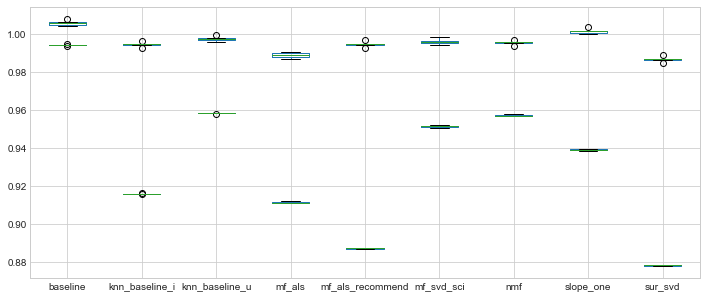

In [46]:
plt.figure(figsize=(12,5))
train_errors_new.boxplot()
test_errors_new.boxplot()

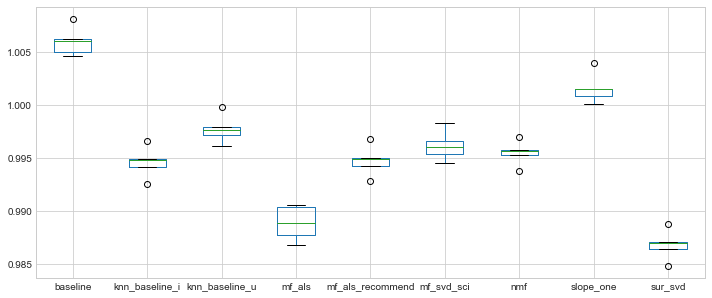

In [47]:
plt.figure(figsize=(12,5))
test_errors_new.boxplot()

# Model errors (from prediction files)

In [49]:
from datafile_methods.data_processing import disjoint_subsets_on_support, obtain_indices_high_support

fold_pred = [[load_data('{p}model_{m}_te_{i}.csv'.format(p=PREDICTION_PATH, m=model, i=i)) for i in range(5)] for model in models]

fold_pred_dict = dict(zip(models, fold_pred))

ind = obtain_indices_high_support(ratings)

Split predictions for each model into high and low support

In [9]:
fold_pred_high = {k: [disjoint_subsets_on_support(v[i], ind)[0] for i in range(5)] for k,v in fold_pred_dict.items()}
fold_pred_low = {k: [disjoint_subsets_on_support(v[i], ind)[1] for i in range(5)] for k,v in fold_pred_dict.items()}

In [18]:
import scipy.sparse as sp

In [29]:
fold_pred_vals = {k: [sp.find(f)[2] for f in v] for k,v in fold_pred_dict.items()}

In [28]:
fold_pred_high_vals = {k: [sp.find(f)[2] for f in v] for k,v in fold_pred_high.items()}
fold_pred_low_vals = {k: [sp.find(f)[2] for f in v] for k,v in fold_pred_low.items()}

Split observed ratings into high and low support

In [19]:
fold_obs_high = [disjoint_subsets_on_support(f, ind)[0] for f in folds]
fold_obs_low = [disjoint_subsets_on_support(f, ind)[1] for f in folds]

In [31]:
fold_obs_high_vals = [sp.find(f)[2] for f in fold_obs_high]
fold_obs_low_vals = [sp.find(f)[2] for f in fold_obs_low]

In [30]:
fold_obs_vals = [sp.find(f)[2] for f in folds]

Compute RMSE for each fold and prediction model

In [16]:
from prediction_methods.model_helpers import calculate_mse

test_rmse = {k: [np.sqrt(calculate_mse(np.array(fold_obs_vals[i]), np.array(v[i]))/len(np.array(v[i]))) for i in range(5)] for k,v in fold_pred_vals.items()}
test_rmse_df = pd.DataFrame({model: m_errors for model, m_errors in test_rmse.items()})

plt.figure(figsize=(12,5))
test_rmse_df.boxplot()

Compute RMSE for each support level, fold and prediction model

In [61]:
test_rmse_high = {k: [np.sqrt(calculate_mse(np.array(fold_obs_high_vals[i]), np.array(v[i]))/len(np.array(v[i]))) for i in range(5)] for k,v in fold_pred_high_vals.items()}
test_rmse_df_high = pd.DataFrame({model: m_errors for model, m_errors in test_rmse_high.items()})

In [62]:
test_rmse_low = {k: [np.sqrt(calculate_mse(np.array(fold_obs_low_vals[i]), np.array(v[i]))/len(np.array(v[i]))) for i in range(5)] for k,v in fold_pred_low_vals.items()}
test_rmse_df_low = pd.DataFrame({model: m_errors for model, m_errors in test_rmse_low.items()})

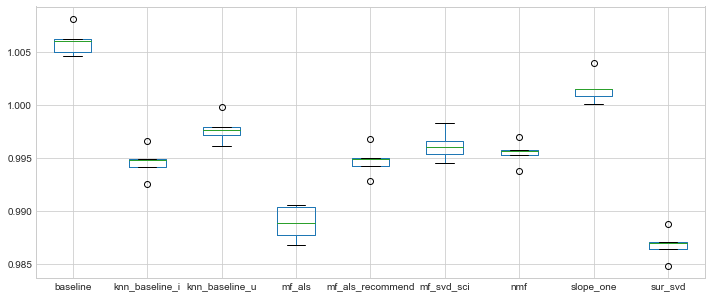

In [63]:
plt.figure(figsize=(12,5))
test_rmse_df.boxplot()

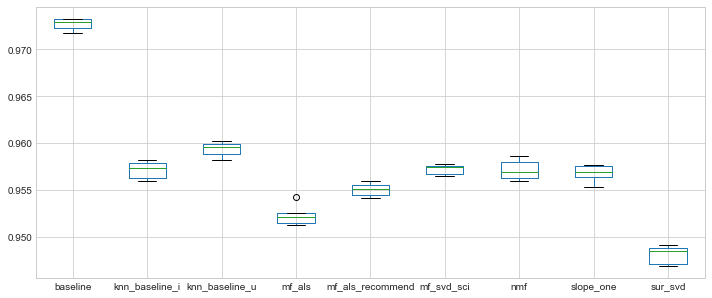

In [64]:
plt.figure(figsize=(12,5))
test_rmse_df_high.boxplot()

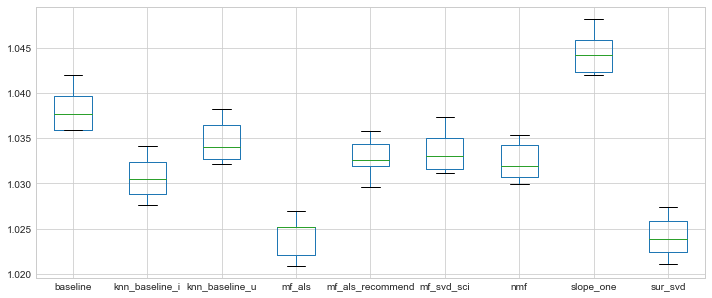

In [96]:
plt.figure(figsize=(12,5))
test_rmse_df_low.boxplot()

#### Compare submission files

In [66]:
models = list(test_errors_new.keys())
n_models = len(models)

fn_sub = [load_data('{}model_{}_sub.csv'.format(PREDICTION_PATH, e))
         for e in models]

In [67]:
nonzero = fn_sub[0].count_nonzero()

diff_mean = np.zeros((n_models, n_models))
diff_max = np.zeros((n_models, n_models))
diff_min = np.zeros((n_models, n_models))

for i in range(n_models):
    for j in range(n_models):
        diff_mean[i,j] = abs(fn_sub[i] - fn_sub[j]).sum() / nonzero
        diff_max[i,j] = abs(fn_sub[i] - fn_sub[j]).max()
        diff_min[i,j] = abs(fn_sub[i] - fn_sub[j]).min()

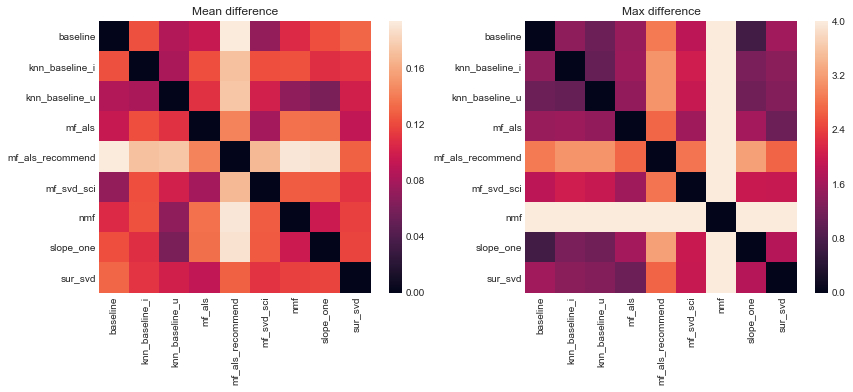

In [68]:
plt.figure(figsize=(14,5))
plt.subplot(121)
sns.heatmap(diff_mean, square=True, xticklabels=models, yticklabels=models)
plt.title('Mean difference')
plt.subplot(122)
sns.heatmap(diff_max, square=True, xticklabels=models, yticklabels=models)
plt.title('Max difference')
plt.show()

### Ensembling with weighted average (manually)

Plots including partial and final ensembles

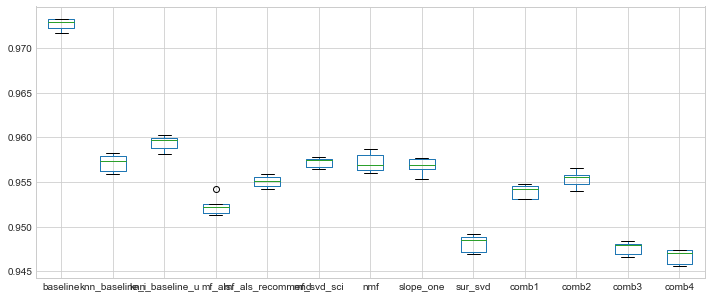

In [105]:
# High support
test_rmse_df_high_bis = test_rmse_df_high.copy()
test_rmse_df_high_bis['comb1'] = pd.Series([ 0.95448856,  0.95312096,  0.95481911,  0.95424292,  0.95309965])
test_rmse_df_high_bis['comb2'] = pd.Series([ 0.95580244,  0.95475547,  0.95653329,  0.95559826,  0.95399995])
test_rmse_df_high_bis['comb3'] = pd.Series([ 0.94835834,  0.94686862,  0.94801877,  0.94796379,  0.94657487])
test_rmse_df_high_bis['comb4'] = pd.Series([ 0.94741908,  0.94584024,  0.94740286,  0.9470366 ,  0.94558639])

plt.figure(figsize=(12,5))
test_rmse_df_high_bis.boxplot()

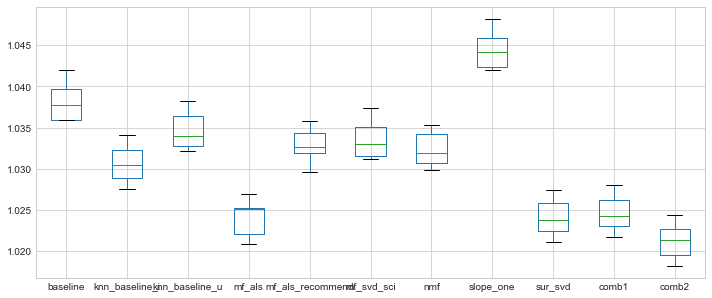

In [106]:
# Low support
test_rmse_df_low_bis = test_rmse_df_low.copy()
test_rmse_df_low_bis['comb1'] = pd.Series([ 1.02421272,  1.02176707,  1.02311522,  1.02800257,  1.02624139])
test_rmse_df_low_bis['comb2'] = pd.Series([ 1.02140833,  1.0182069 ,  1.01955485,  1.02443425,  1.02270629])

plt.figure(figsize=(12,5))
test_rmse_df_low_bis.boxplot()